# Exploratory Data Analysis on a Natural Language Processing Task
> Authors: Caroline Schmitt, Matt Brems

---

Exploratory data analysis (EDA) is a crucial part of any data science project. EDA helps us discover interesting relationships in the data, detect outliers and errors, examine our own assumptions about the data, and prepare for modeling. During EDA we might discover that we need to clean our data more conscientiously, or that we have more missing data than we realized, or that there aren't many patterns in the data (indicating that modeling may be challenging.)

In this lab you'll bring in a natural language dataset and perform EDA. The dataset contains Facebook statuses taken from between 2009 and 2011 as well as personality test results associated with the users whose Facebook statuses are included.

This dataset uses results from the Big Five Personality Test, also referred to as the five-factor model, which measures a person's score on five dimensions of personality:
- **O**penness
- **C**onscientiousness
- **E**xtroversion
- **A**greeableness
- **N**euroticism

Notoriously, the political consulting group Cambridge Analytica claims to have predicted the personalities of Facebook users by using those users' data, with the goal of targeting them with political ads that would be particularly persuasive given their personality type. Cambridge Analytica claims to have considered 32 unique 'groups' in the following fashion:
- For each of the five OCEAN qualities, a user is categorized as either 'yes' or 'no'.
- This makes for 32 different potential combinations of qualities. ($2^5 = 32$).

Cambridge Analytica's methodology was then, roughly, the following:
- Gather a large amount of data from Facebook.
- Use this data to predict an individual's Big Five personality "grouping."
- Design political advertisements that would be particularly effective to that particular "grouping." (For example, are certain advertisements particularly effective toward people with specific personality traits?)

In this lab you will perform EDA to examine many relationships in the data.

Exploratory data analysis can be a non-linear process, and you're encouraged to explore questions that occur to you as you work through the notebook.

> **Content note**: This dataset contains real Facebook statuses scraped from 2009 to 2011, and some of the statuses contain language that is not safe for work, crude, or offensive. The full dataset is available as `mypersonality.csv`, and a sanitized version containing only statuses that passed an automated profanity check is available as `mypersonality_noprofanity.csv`. Please do not hesitate to use `mypersonality_noprofanity.csv` if you would prefer to. Please note that the automated profanity check is not foolproof. If you have any concerns about working with this dataset, please get in touch with your section lead.

---

### External resources

These resources are not required reading but may be of use or interest.

- [Python Graph Gallery](https://python-graph-gallery.com/)
- [Wikipedia page](https://en.wikipedia.org/wiki/Big_Five_personality_traits) on the Big Five test
- [A short (3-4 pages) academic paper](./celli-al_wcpr13.pdf) using the `MyPersonality` dataset to model personality

---

## Load packages

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer

# this setting widens how many characters pandas will display in a column:
pd.options.display.max_colwidth = 400

---

## Load data

In [2]:
df = pd.read_csv('data/mypersonality.csv')
# df = pd.read_csv('data/mypersonality_noprofanity.csv') # comment out above & uncomment this to use mypersonality_noprofanity.csv
df.drop(columns=['NETWORKSIZE', 'BETWEENNESS', 'NBETWEENNESS', 'DENSITY', 'BROKERAGE', 'NBROKERAGE', 'TRANSITIVITY'], inplace=True)
df.head(3)

,#AUTHID,STATUS,sEXT,sNEU,sAGR,sCON,sOPN,cEXT,cNEU,cAGR,cCON,cOPN,DATE
0,b7b7764cfa1c523e4e93ab2a79a946c4,likes the sound of thunder.,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,06/19/09 03:21 PM
1,b7b7764cfa1c523e4e93ab2a79a946c4,is so sleepy it's not even funny that's she can't get to sleep.,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,07/02/09 08:41 AM
2,b7b7764cfa1c523e4e93ab2a79a946c4,"is sore and wants the knot of muscles at the base of her neck to stop hurting. On the other hand, YAY I'M IN ILLINOIS! <3",2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,06/15/09 01:15 PM


---

## EDA on Statuses

Before we even vectorize the text, we might look at the lengths and word counts in each Facebook status.

#### Create a new column called `status_length` that contains the length of each status:

In [3]:
# Create a new column 'status_length' with the length of each status
df['status_length'] = df['STATUS'].apply(len)
df.head(3)

,#AUTHID,STATUS,sEXT,sNEU,sAGR,sCON,sOPN,cEXT,cNEU,cAGR,cCON,cOPN,DATE,status_length
0,b7b7764cfa1c523e4e93ab2a79a946c4,likes the sound of thunder.,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,06/19/09 03:21 PM,27
1,b7b7764cfa1c523e4e93ab2a79a946c4,is so sleepy it's not even funny that's she can't get to sleep.,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,07/02/09 08:41 AM,63
2,b7b7764cfa1c523e4e93ab2a79a946c4,"is sore and wants the knot of muscles at the base of her neck to stop hurting. On the other hand, YAY I'M IN ILLINOIS! <3",2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,06/15/09 01:15 PM,121


#### Create a new column called `status_word_count` that contains the number of words in each status:

Note: You can evaluate this based off of how many strings are separated by whitespaces; you're not required to check that each set of characters set apart by whitespaces is a word in the dictionary.

In [4]:
# Create a new column 'status_word_count' with the length of each status
# Count the number of words in each status
df['status_word_count'] = df['STATUS'].apply(lambda x: len(x.split()))
df.head(3)

,#AUTHID,STATUS,sEXT,sNEU,sAGR,sCON,sOPN,cEXT,cNEU,cAGR,cCON,cOPN,DATE,status_length,status_word_count
0,b7b7764cfa1c523e4e93ab2a79a946c4,likes the sound of thunder.,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,06/19/09 03:21 PM,27,5
1,b7b7764cfa1c523e4e93ab2a79a946c4,is so sleepy it's not even funny that's she can't get to sleep.,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,07/02/09 08:41 AM,63,13
2,b7b7764cfa1c523e4e93ab2a79a946c4,"is sore and wants the knot of muscles at the base of her neck to stop hurting. On the other hand, YAY I'M IN ILLINOIS! <3",2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,06/15/09 01:15 PM,121,26


### Longest and shortest statuses

Looking at individual observations can help us get a sense of what the dataset contains.

#### Show the five longest and five shortest statuses based off of `status_word_count`:

In [5]:
df = df.sort_values(by = 'status_word_count', ascending= True)
print(f'Top 5 Shortest Statuses')
display(df.head(5))
print(f'Top 5 Longest Statuses')
display(df.tail(5))

Top 5 Shortest Statuses


,#AUTHID,STATUS,sEXT,sNEU,sAGR,sCON,sOPN,cEXT,cNEU,cAGR,cCON,cOPN,DATE,status_length,status_word_count
8178,4bbb1f5843d9d6e8966dce58179f01de,157,2.55,2.65,4.0,2.95,4.05,n,n,y,n,y,07/13/09 01:27 PM,3,1
4170,dba5f5266d03dd6d4db084ad7dbc683c,"wed,.",1.55,2.45,3.5,3.40,4.50,n,n,n,n,y,09/02/09 05:32 AM,5,1
2016,c3f4b3e345cb6b032db2e0459d179db3,HOUSE!,2.45,4.00,3.8,2.80,4.25,n,y,y,n,y,10/13/09 12:00 AM,6,1
956,e6cdef6f475cce3023c5b715f8c9f110,Err:509,1.80,2.90,2.9,3.00,4.20,n,y,n,n,y,10/10/09 07:23 PM,7,1
4177,dba5f5266d03dd6d4db084ad7dbc683c,confused,1.55,2.45,3.5,3.40,4.50,n,n,n,n,y,09/04/09 02:18 AM,8,1


Top 5 Longest Statuses


,#AUTHID,STATUS,sEXT,sNEU,sAGR,sCON,sOPN,cEXT,cNEU,cAGR,cCON,cOPN,DATE,status_length,status_word_count
9695,ab10a89d4fa299fe348a3ee1d183b3ee,I was totally freaked out tonight while driving home with Janice at 12am. The black coupe next to me matched my speed even though I was going fast and then he continued to match me speed as I slowed down. So I turn to look at the driver of the car and he's wearing a mask. A rubber mask reminiscent to freddy cruger. 0_0 I almost had a heart attack. I then slowed down a lot and he continued on.....,4.38,2.38,4.00,3.25,2.63,y,n,y,n,n,09/21/09 07:28 AM,415,83
5680,1ece40ac9b657dea8c22a1fe58d3a6fe,"I always make it a rule to let the other fellow fire first. If a man wants to fight, I argue the question with him and try to show him how foolish it would be. If he can't be dissuaded, why then the fun begins but I always let him have first crack. Then when I fire, you see, I have the verdict of self-defence on my side. I know that he is pretty certain in his hurry, to miss. I never do.",3.50,1.75,4.75,3.00,4.25,n,n,y,n,y,12/07/09 04:07 AM,395,83
5208,c85845b82e705a32f674757d8912df23,"can't believe it. I got the new Wii Fit Plus game, it has a lot of fun new games and features. However, after not using the wii fit for a few months we decided to do the fitness test stuff again. Me(since last time): +2.9 lbs, still a healthy weight and BMI, wii age 54. *PROPNAME*: -8.6lbs, reccommends a healthy weight of gaining 6lbs, wii age 32. On the positive side, I have lost 5 of the 8 l...",2.25,2.75,4.50,4.25,2.50,n,n,y,y,n,01/08/10 07:32 PM,426,84
6989,502db2fcfe26705ae16a46c5cb2ad2e5,"If I wear makeup, I'm fake. If I like to get dressed up, I'm a Tart. If I say what i think, I'm a bitch. If I cry sometimes, I'm a drama queen. If I have guy friends, I'm a slut. If I stand up for myself, I'm mouthy. Seems like you can't do anything now a days without being labeled.. So what, go ahead and label me, see if i give a shit. Repost this if your proud of who you are! x x",3.20,3.30,4.55,3.20,4.45,n,y,y,n,y,02/18/11 08:33 AM,384,85
496,9a8cf1dcb2de1a8f70c4745a636bbb96,"Exact words when renewing DL: Me: Oh no, you can't take my license, It's my 25th b-day. How am I going to get into the bar? DMV: We gonna give you a new one over there Me: But, it won't have my picture and stuff on it. Dmv: Hold up, we can take a picture of your picture and put it on a license i think. (yelling at co-worker to see if this can be done) Yup! Me: So, I can go to the bar?! Dmv: ...",3.75,3.25,4.50,5.00,4.00,y,y,y,y,y,10/30/09 02:05 PM,413,89


## What's the distribution of post lengths?

Use visuals to show the distributions of post lengths. Show both the distribution of word counts and the distribution of lengths based off character.

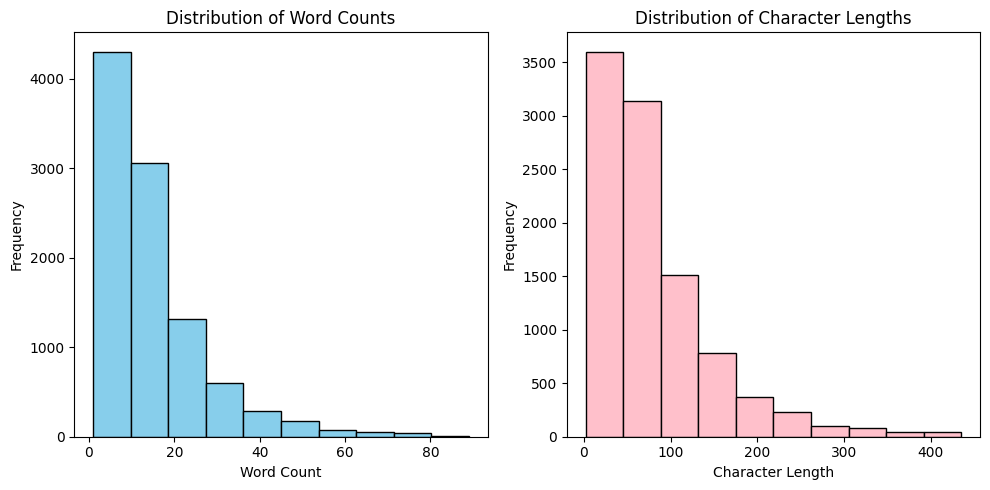

In [6]:
# Plot the distribution of word counts
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(df['status_word_count'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Word Counts')
plt.xlabel('Word Count')
plt.ylabel('Frequency')

# Plot the distribution of character lengths
plt.subplot(1, 2, 2)
plt.hist(df['status_length'], bins=10, color='pink', edgecolor='black')
plt.title('Distribution of Character Lengths')
plt.xlabel('Character Length')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

---

## EDA of Personality Scores

There are two sets of personality columns in the dataset: class and score. According to the attached paper, scores have been converted to categories based on whether a score for a user fell above or below the median.

### Plot the distributions of personality scores for all five score columns:

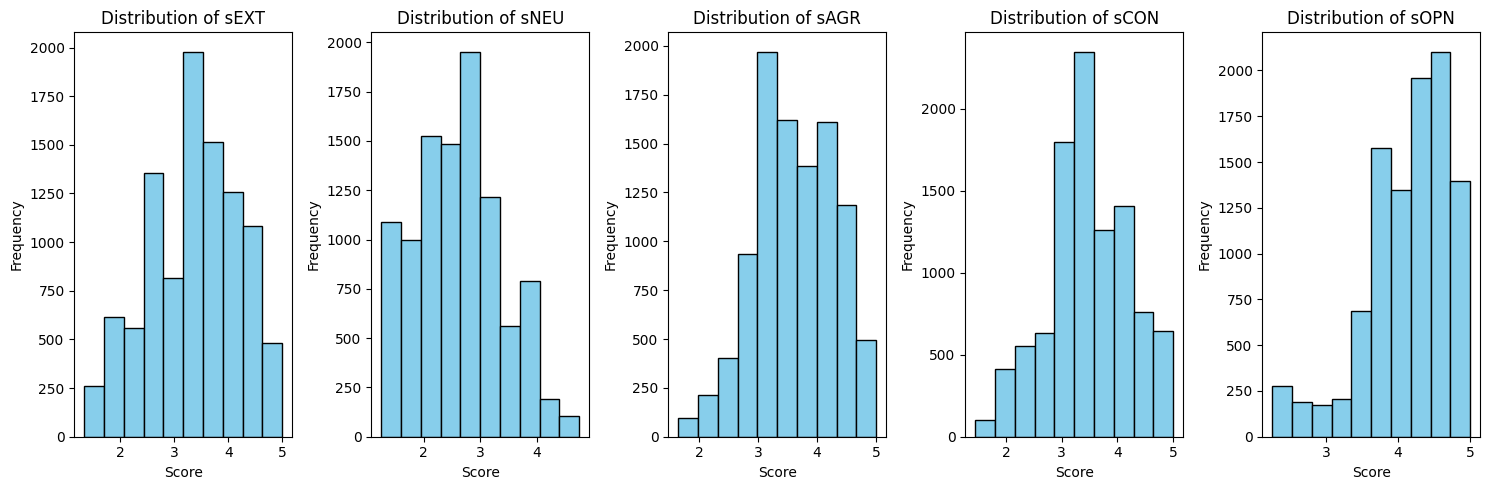

In [7]:
# Plotting
plt.figure(figsize=(15, 5))
for i, col in enumerate(['sEXT', 'sNEU', 'sAGR', 'sCON', 'sOPN'], 1):
    plt.subplot(1, 5, i)
    plt.hist(df[col], bins=10, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel('Score')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

---

### How many unique users exist in the dataset?

This dataset has redacted original poster names, but each user is given an `#AUTHID`. How many unique users are there, and how many posts per user do we have?

In [8]:
# Group by '#AUTHID' and count the number of posts per user
posts_per_user = df.groupby('#AUTHID').size().reset_index(name = 'post_count')

# Count the number of unique users
unique_users_count = posts_per_user['#AUTHID'].nunique()

print("Number of unique users:", unique_users_count)
print("Posts per user:")
print(posts_per_user)

Number of unique users: 250
Posts per user:
                              #AUTHID  post_count
0    00419a4c96b32cd63b2c7196da761274           1
1    02c37028a782cfda660c7243e45244bb           6
2    03133a828cd0cf52e3752813ce5d818f           5
3    03e6c4eca4269c183fa0e1780f73faba           8
4    06b055f8e2bca96496514891057913c3          12
..                                ...         ...
245  f83aa7290cf3ae8ed75d6aee5ebbb559           6
246  fbe5aa478508d1dc931427ade5d9e1b4           3
247  fc1c9fb6c64740edcbbf8cfe9dde8b02          30
248  fe22087986fdcc65939c793fe0ec90a9          19
249  fffafe151f07a30a0ede2038a897b680          21

[250 rows x 2 columns]


## EDA on unique users

Because we have many posts per user for most users, doing EDA on the personality score columns might be misleading. If we have 200 Facebook statuses from one very high-conscientiousness user, a bar chart of how many `'cCON'` statuses are associated with `'y'` might be misleading. We'll have to be careful about labeling and titling any visualizations we make off of the dataset.

#### Create a new dataframe called `unique_users` that only contains the `#AUTHID`, personality score, and personality category columns:

If you do this correctly, it should have 250 rows and 11 columns.

(Hint: You can use the pandas [drop_duplicates()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html) method to make this easier. The only column you want to consider when deciding if a user is duplicated is the `#AUTHID` column.)

In [9]:
unique_users = df[['#AUTHID','sEXT', 'sNEU', 'sAGR', 'sCON', 'sOPN','cEXT', 'cNEU', 'cAGR', 'cCON', 'cOPN']].drop_duplicates(subset = '#AUTHID')
unique_users.shape

(250, 11)

#### Plot the distribution of personality scores for `unique_users`:

Do the distributions look different? Here, each individual user will only be represented once.

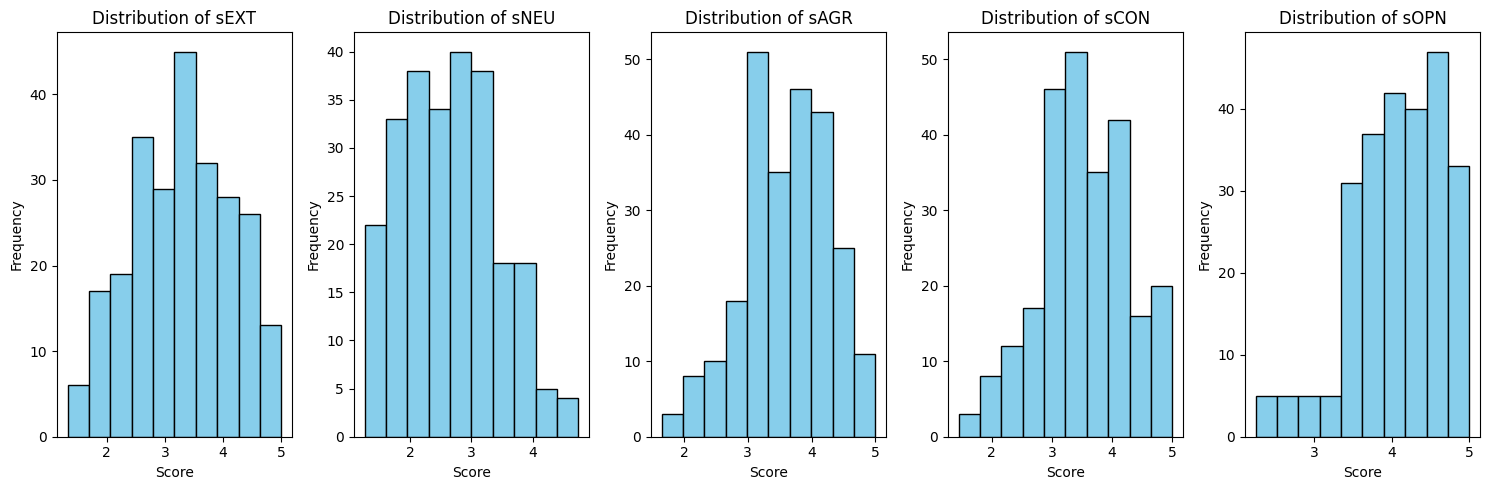

In [10]:
# Plotting
plt.figure(figsize=(15, 5))
for i, col in enumerate(['sEXT', 'sNEU', 'sAGR', 'sCON', 'sOPN'], 1):
    plt.subplot(1, 5, i)
    plt.hist(unique_users[col], bins=10, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel('Score')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

#### Use the `.describe()` method on `unique_users`:

In [11]:
unique_users.describe()

,sEXT,sNEU,sAGR,sCON,sOPN
count,250.000000,250.000000,250.000000,250.000000,250.00000
mean,3.292120,2.627240,3.600320,3.522920,4.07856
std,0.861368,0.776835,0.670758,0.740211,0.57506
min,1.330000,1.250000,1.650000,1.450000,2.25000
25%,2.662500,2.000000,3.150000,3.000000,3.75000
50%,3.300000,2.590000,3.660000,3.500000,4.15000
75%,4.000000,3.150000,4.100000,4.050000,4.50000
max,5.000000,4.750000,5.000000,5.000000,5.00000


### Plots vs. Tables

Consider what different information is easily conveyed by the plots of scores, versus the table with summary statistics. Explain when you might present a distribution versus when you might present a table of summary statistics.

Answer: Plot is better visually represatative, easily grasp overall distribution and pattern of all data. Easier to spot outliners. However plot doesnt really show the exact value and limited details of data. While representing in table we can see the stats of the data, but we need to take time to have a look at the data.

#### Other visualizations:

Create 1-2 additional visualizations related to the `unique_users` dataframe.

You might consider:
- Barcharts of users per category per trait
- A seaborn correlation heatmap
- A seaborn pairplot

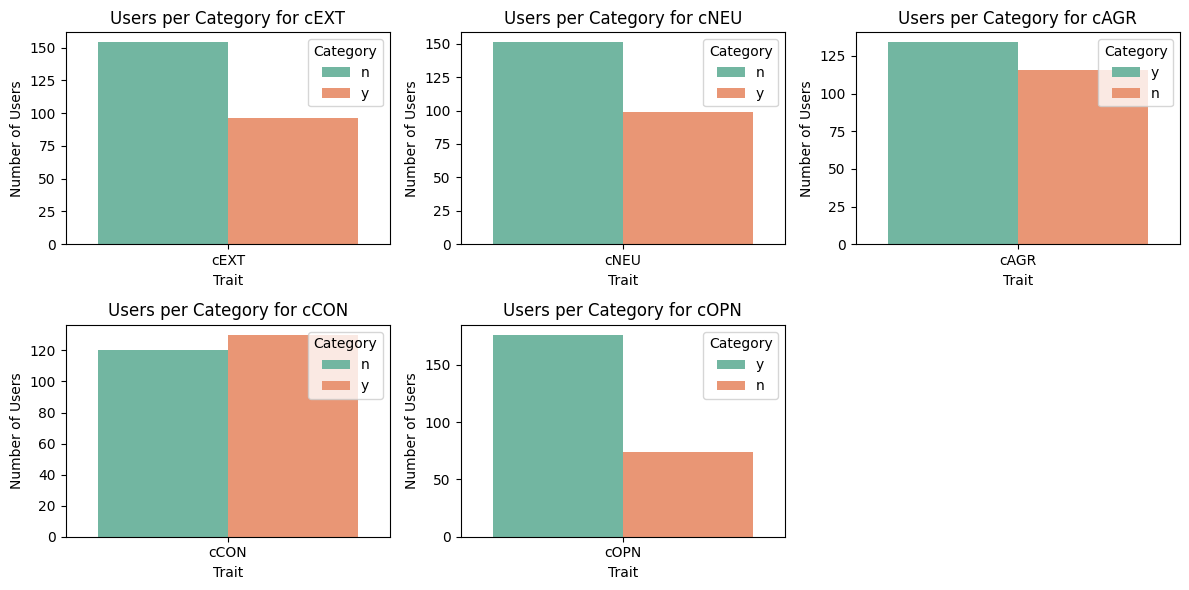

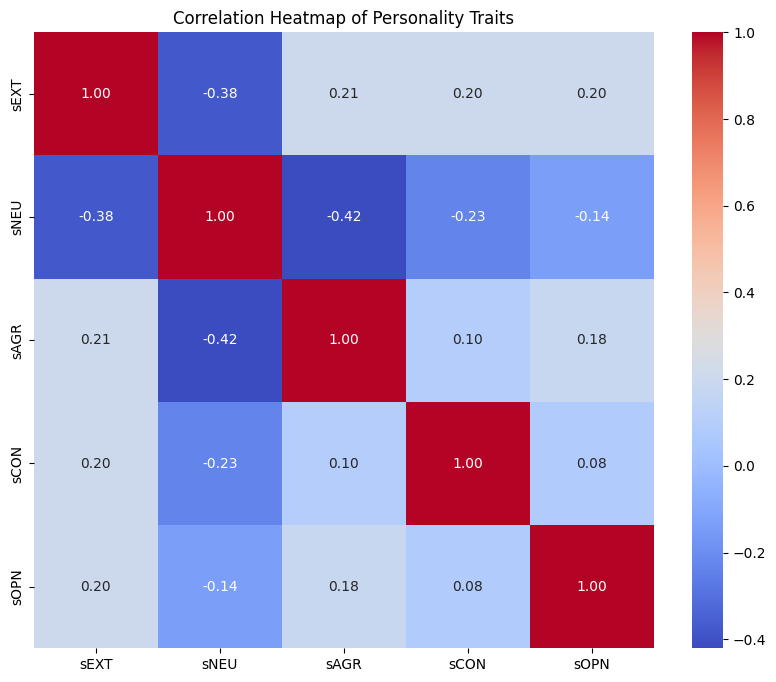

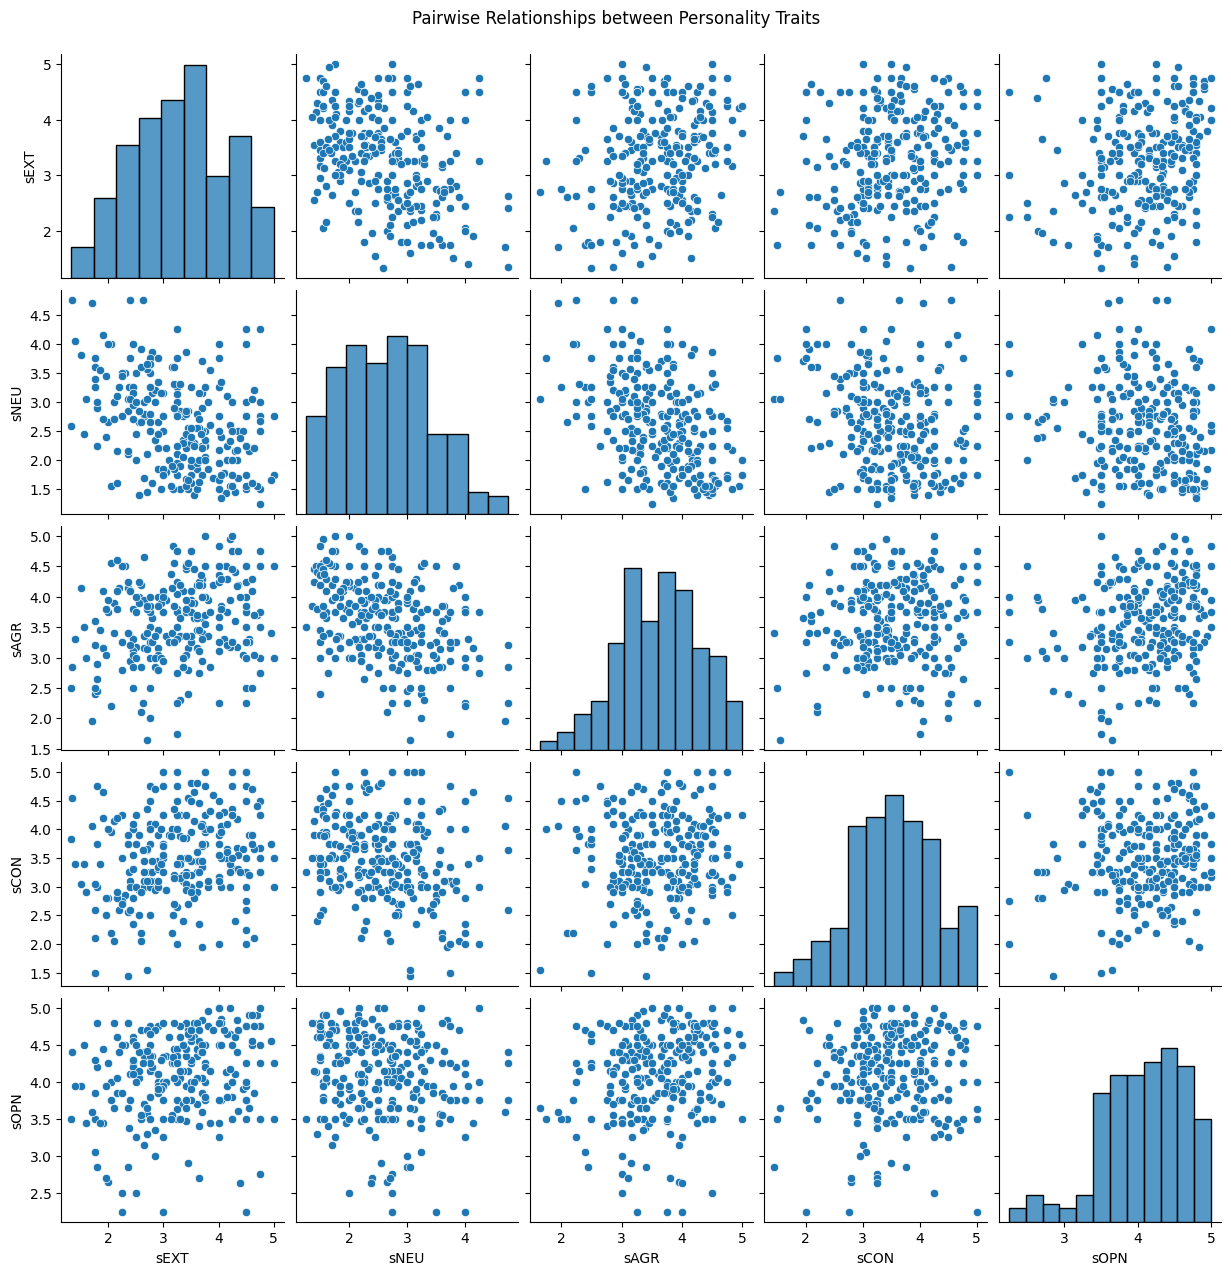

In [12]:
# Barcharts of Users per Category per Trait
plt.figure(figsize=(12, 6))
traits = ['cEXT', 'cNEU', 'cAGR', 'cCON', 'cOPN']
for i, trait in enumerate(traits, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x='Trait', hue='Category', data=unique_users.melt(value_vars=[trait], var_name='Trait', value_name='Category'), palette='Set2')
    plt.title(f'Users per Category for {trait}')
    plt.xlabel('Trait')
    plt.ylabel('Number of Users')
plt.tight_layout()
plt.show()

# Seaborn Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(unique_users[['sEXT', 'sNEU', 'sAGR', 'sCON', 'sOPN']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Personality Traits')
plt.show()

# Seaborn Pairplot
sns.pairplot(data=unique_users[['sEXT', 'sNEU', 'sAGR', 'sCON', 'sOPN']])
plt.suptitle('Pairwise Relationships between Personality Traits', y=1.02)
plt.show()

---

## Exploring status length and word count based on personality

#### Using `groupby()`, find the mean status length and status word count for posts by users in the high and low categories of each of the Big 5 traits.

You'll need to use `groupby()` five separate times for this.

In [13]:
df.columns

Index(['#AUTHID', 'STATUS', 'sEXT', 'sNEU', 'sAGR', 'sCON', 'sOPN', 'cEXT',
       'cNEU', 'cAGR', 'cCON', 'cOPN', 'DATE', 'status_length',
       'status_word_count'],
      dtype='object')

In [14]:
#testing to access mean value of Openness 
df.groupby('cOPN')[['status_length','status_word_count']].mean()

,status_length,status_word_count
cOPN,,
n,85.686298,15.450726
y,78.905143,14.205184


In [15]:
# Grouping by high and low categories of each Big 5 trait and calculating mean status length and word count
mean_status_length_word_count = {}

# List of Big 5 traits
traits = ['cEXT', 'cNEU', 'cAGR', 'cCON', 'cOPN']

for trait in traits:
    # Group by high and low categories of the trait
    grouped = df.groupby(trait)
    
    # Calculate mean status length and word count for each category
    mean_length_word_count = grouped[['status_length', 'status_word_count']].mean()
    
    # Store the result in a dictionary
    mean_status_length_word_count[trait] = mean_length_word_count

# Display the results
for trait, data in mean_status_length_word_count.items():
    print(f"Trait: {trait}")
    print(data)
    print()

Trait: cEXT
      status_length  status_word_count
cEXT                                  
n         79.866655          14.394428
y         81.704918          14.702305

Trait: cNEU
      status_length  status_word_count
cNEU                                  
n         80.852396          14.548314
y         80.304278          14.486414

Trait: cAGR
      status_length  status_word_count
cAGR                                  
n         80.976769          14.616692
y         80.355800          14.444276

Trait: cCON
      status_length  status_word_count
cCON                                  
n         81.920149          14.709515
y         79.149034          14.308165

Trait: cOPN
      status_length  status_word_count
cOPN                                  
n         85.686298          15.450726
y         78.905143          14.205184



#### Choose one of the personality category columns (i.e. `cOPN`, `cCON`, `cEXT`, `cAGR`, or `cNEU`.) Use `sns.distplot()` to visualize the distribution of status word counts for posts by users who score both high (`y`) and low (`n`) in that personality category:

C:\Users\ng_we\AppData\Local\Temp\ipykernel_29784\3400166109.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(high_category_data['status_word_count'], label='High Category', hist=False)
C:\Users\ng_we\AppData\Local\Temp\ipykernel_29784\3400166109.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750

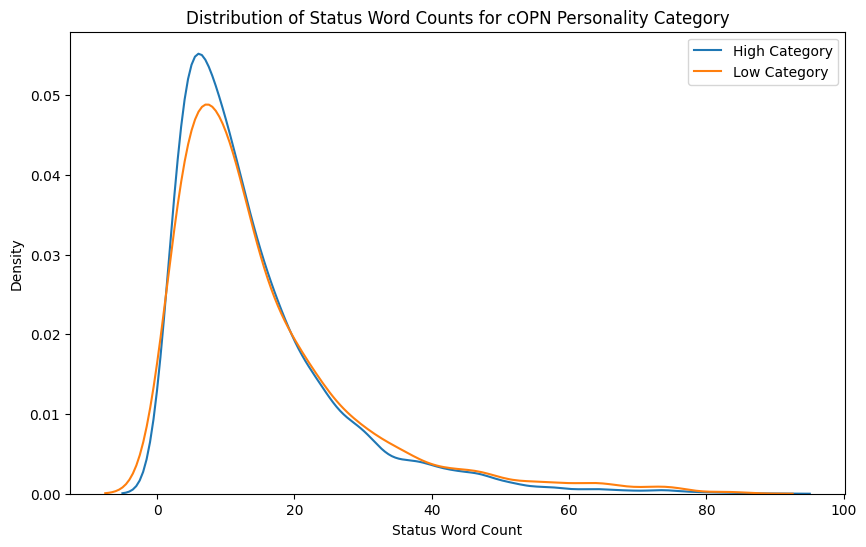

In [18]:
# Filter DataFrame for high and low categories of the chosen personality category
high_category_data = df[df['cOPN'] == 'y']
low_category_data = df[df['cOPN'] == 'n']

# Plot the distribution of status word counts for each category
plt.figure(figsize=(10, 6))
sns.distplot(high_category_data['status_word_count'], label='High Category', hist=False)
sns.distplot(low_category_data['status_word_count'], label='Low Category', hist=False)
plt.title(f'Distribution of Status Word Counts for cOPN Personality Category')
plt.xlabel('Status Word Count')
plt.ylabel('Density')
plt.legend()
plt.show()

---

## EDA on Word Counts

### Vectorize the text

In order to perform EDA on word count data, we'll need to count-vectorize.

Create a dataframe that contains the count-vectorized text for each Facebook status in the dataset.

To do this, you might follow these steps:
- Instantiate a `CountVectorizer` object
- Fit the count vectorizer on the Facebook statuses
- Store the transformed data
- Convert to a dataframe and store
    - Don't forget that the transformed data will need to be 'densified'. The `toarray()` or `todense()` methods will allow this.
    - Don't forget that the `get_feature_names()` method on a fitted `CountVectorizer` object will bring you back the words learned from the dataset, which you can set as the `columns` argument when creating the dataframe.
    
It's up to you whether or not to keep stopwords in the dataset.

In [19]:
# Instantiate a CountVectorizer object
vectorizer = CountVectorizer()

In [20]:
# Fit the count vectorizer on the Facebook statuses and transform the data
count_vectorized_data = vectorizer.fit_transform(df['STATUS'])

In [22]:
# Convert the transformed data to a dataframe
count_vectorized_df = pd.DataFrame(count_vectorized_data.toarray(), columns=vectorizer.get_feature_names_out())

### Show the 15 most common words

In [32]:
# Sum up the counts of each word across all statuses, sort desendingly and get the first 15 words
top_15_words = count_vectorized_df.sum().sort_values(ascending=False).head(15)
print(f'Below are the top 15 words:\n{top_15_words}')

Below are the top 15 words:
the         4982
to          4476
is          3156
and         3057
of          2093
in          1984
it          1669
for         1641
my          1564
you         1495
propname    1309
that        1158
on          1094
with         956
be           894
dtype: int64


### Show the 15 frequency of the most common words as a bar chart

**Hint**: You can do this in one line of code. [This webpage](https://dfrieds.com/data-visualizations/bar-plot-python-pandas.html) has an example.

<Axes: >

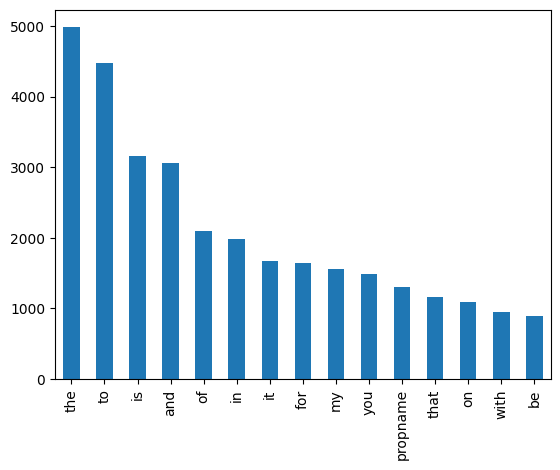

In [33]:
top_15_words.plot(kind='bar')

### Investigating `propname`

The word `propname` shows up frequently in this dataset. Show the first 10 statuses in the dataset that contain `propname`:

In [40]:
df.columns

Index(['#AUTHID', 'STATUS', 'sEXT', 'sNEU', 'sAGR', 'sCON', 'sOPN', 'cEXT',
       'cNEU', 'cAGR', 'cCON', 'cOPN', 'DATE', 'status_length',
       'status_word_count'],
      dtype='object')

In [59]:
# Filter the DataFrame for statuses containing 'propname'
propname_statuses = df[df['STATUS'].str.contains('PROPNAME')]

# Display the first 10 statuses containing 'propname'
print("The first 10 statuses containing 'propname' are:")
print(propname_statuses['STATUS'].head(10))

The first 10 statuses containing 'propname' are:
1000            *PROPNAME* 
6308             *PROPNAME*
7504             *PROPNAME*
2141             *PROPNAME*
8316          *PROPNAME*'s?
1634             *PROPNAME*
5666      RIP *PROPNAME*...
3838      R.I.P. *PROPNAME*
5565      loved *PROPNAME*!
2101    Goodbye *PROPNAME*.
Name: STATUS, dtype: object


#### Provide a short explanation of what you believe `propname` to be:

Hint: The attached PDF also contains an explanation.

myPersonality have been anonymized manually. For instance each proper name of person has been replaced with a fixed string (*PROPNAME*).

## Most common words based on personality category

In order to do more targeted EDA, we'll need to be able to reference not only the dataframe of vectorized statuses, but also the personality scores from the original dataframe.

#### Create a new dataframe called `text_and_scores` that concatenates the count-vectorized statuses side-by-side with the original personality category columns:

In [63]:
# Concatenate count-vectorized statuses with original personality category columns
text_and_scores = pd.concat([count_vectorized_df, df[['cEXT', 'cNEU', 'cAGR', 'cCON', 'cOPN']]], axis=1)

text_and_scores.head()

,00,000,000ft,00am,00pm,01,02,02pm,03,0330,...,été,être,østersund,últimas,últimos,cEXT,cNEU,cAGR,cCON,cOPN
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,n,y,n,n,y
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,n,y,n,n,y
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,n,y,n,n,y
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,n,y,n,n,y
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,n,y,n,n,y


#### Show the 25 most common words for statuses from high-cAGR users:

In [64]:
# Filter the text_and_scores dataframe for statuses from high-cAGR users
high_cAGR_statuses = text_and_scores[text_and_scores['cAGR'] == 'y']

# Sum up the counts of each word across statuses from high-cAGR users
word_counts_high_cAGR = high_cAGR_statuses.drop(columns=['cEXT', 'cNEU', 'cAGR', 'cCON', 'cOPN']).sum()

# Sort the word counts in descending order and display the top 25 words
top_25_words_high_cAGR = word_counts_high_cAGR.sort_values(ascending=False).head(25)

# Display the 25 most common words for statuses from high-cAGR users
print("The 25 most common words for statuses from high-cAGR users are:")
print(top_25_words_high_cAGR)

The 25 most common words for statuses from high-cAGR users are:
the         2590
to          2307
is          1667
and         1606
of          1109
in          1047
it           883
for          866
my           833
you          725
propname     670
that         571
on           542
with         499
be           467
at           412
me           406
so           388
this         376
not          361
just         352
have         349
all          341
can          332
out          327
dtype: int64


#### Show the 25 most common words for statuses from low-cAGR users:

In [65]:
# Filter the text_and_scores dataframe for statuses from low-cAGR users
low_cAGR_statuses = text_and_scores[text_and_scores['cAGR'] == 'n']

# Sum up the counts of each word across statuses from low-cAGR users
word_counts_low_cAGR = low_cAGR_statuses.drop(columns=['cEXT', 'cNEU', 'cAGR', 'cCON', 'cOPN']).sum()

# Sort the word counts in descending order and display the top 25 words
top_25_words_low_cAGR = word_counts_low_cAGR.sort_values(ascending=False).head(25)

# Display the 25 most common words for statuses from low-cAGR users
print("The 25 most common words for statuses from low-cAGR users are:")
print(top_25_words_low_cAGR)


The 25 most common words for statuses from low-cAGR users are:
the         2392
to          2169
is          1489
and         1451
of           984
in           937
it           786
for          775
you          770
my           731
propname     639
that         587
on           552
with         457
be           427
me           410
at           384
this         384
have         371
just         365
so           338
not          322
all          308
can          304
but          282
dtype: int64


### (BONUS) Most common bigrams:

This is a bonus section and not required.

Find the 10 most common bigrams in the dataset.

In [71]:
# Instantiate a CountVectorizer object for bigrams
vectorizer_bigram = CountVectorizer(ngram_range=(2, 2))

# Fit and transform the count vectorizer on the Facebook statuses
bigram_vectorized_data = vectorizer_bigram.fit_transform(df['STATUS'])

# Get the feature names (bigrams)
bigram_feature_names = vectorizer_bigram.get_feature_names_out()

# Sum up the counts of each bigram
bigram_counts = bigram_vectorized_data.sum(axis=0)

# Create a dictionary to store bigram counts
bigram_count_dict = {}

# Populate the dictionary with bigram counts and their corresponding feature names
for bigram, count in zip(bigram_feature_names, bigram_counts.tolist()[0]):
    bigram_count_dict[bigram] = count

# Sort the dictionary by counts in descending order
sorted_bigram_count = sorted(bigram_count_dict.items(), key=lambda x: x[1], reverse=True)

# Display the 10 most common bigrams
print("The 10 most common bigrams in the dataset are:")
for bigram, count in sorted_bigram_count[:10]:
    print(f"{bigram}: {count}")

The 10 most common bigrams in the dataset are:
in the: 448
of the: 323
for the: 318
going to: 295
to the: 290
to be: 284
on the: 217
at the: 172
to get: 165
to go: 162


### (BONUS) Most common trigrams:

This is a bonus section and not required.

Find the 10 most common trigrams in the dataset.

In [72]:
# Instantiate a CountVectorizer object for trigrams
vectorizer_trigram = CountVectorizer(ngram_range=(3, 3))

# Fit and transform the count vectorizer on the Facebook statuses
trigram_vectorized_data = vectorizer_trigram.fit_transform(df['STATUS'])

# Get the feature names (trigrams)
trigram_feature_names = vectorizer_trigram.get_feature_names_out()

# Sum up the counts of each trigram
trigram_counts = trigram_vectorized_data.sum(axis=0)

# Create a dictionary to store trigram counts
trigram_count_dict = {}

# Populate the dictionary with trigram counts and their corresponding feature names
for trigram, count in zip(trigram_feature_names, trigram_counts.tolist()[0]):
    trigram_count_dict[trigram] = count

# Sort the dictionary by counts in descending order
sorted_trigram_count = sorted(trigram_count_dict.items(), key=lambda x: x[1], reverse=True)

# Display the 10 most common trigrams
print("The 10 most common trigrams in the dataset are:")
for trigram, count in sorted_trigram_count[:10]:
    print(f"{trigram}: {count}")

The 10 most common trigrams in the dataset are:
is going to: 93
propname and propname: 56
going to be: 45
looking forward to: 41
to go to: 38
going to the: 35
propname propname propname: 34
out of the: 32
in the morning: 29
the rest of: 28


---

## Choose your own adventure

By now you've looked at a lot of visualizations and frequency counts.

Come up with 2-3 questions about the data, and try to answer them using descriptive statistics (like counts, averages, etc.) or visualizations.

Some questions you might explore:
- Have numbers been redacted, or are phone numbers, house numbers, or zip codes anywhere in the dataset?
- `PROPNAME` has been used to redact personal names. Given that this data was scraped between 2009 and 2011, investigate if any public figures or famous people show up in the dataset, or their names have been redacted as well.
- Is count of uppercase letters vs. lowercase letters per status related to any personality category or personality score?
- Is _average_ word count per status related to any personality category or personality metric?
- Is punctuation use related to personality?

Or, of course, come up with your own questions to investigate!

The focus here is on "explore" -- you might not find anything of particular interest, but don't let that discourage you.

*Answer:*
- Is there a relationship between the average word count per status and personality category or personality score?
- Does the use of punctuation vary across different personality categories or personality scores?
- Are there any patterns in the distribution of uppercase and lowercase letters per status in relation to personality traits?

1. Relationship between Average Word Count and Personality:
To answer this question, we can calculate the average word count per status and then examine whether there are any differences in this average across different personality categories or scores.

2. Variation in Punctuation Use:
We can analyze the frequency of punctuation marks (such as periods, exclamation marks, question marks, etc.) in statuses and investigate whether there are differences in punctuation use based on personality categories or scores.

3. Patterns in Uppercase and Lowercase Letters:
We can calculate the ratio of uppercase to lowercase letters in each status and then explore whether there are any correlations or differences in this ratio across different personality traits.

---

## Exploratory vs. Explanatory Data Analysis 

> **Exploratory analysis** is what you do to get familiar with the data. You may start out with a hypothesis or question, or you may just really be delving into the data to determine what might be interesting about it. Exploratory analysis is the process of turning over 100 rocks to find perhaps 1 or 2 precious gemstones.
>
> **Explanatory analysis** is what happens when you have something specific you want to show an audience - probably about those 1 or 2 precious gemstones. In my blogging and writing, I tend to focus mostly on this latter piece, explanatory analysis, when you've already gone through the exploratory analysis and from this have determined something specific you want to communicate to a given audience: in other words, when you want to tell a story with data.

- Cole Nussbaumer Knaflic, [exploratory vs. explanatory analysis](http://www.storytellingwithdata.com/blog/2014/04/exploratory-vs-explanatory-analysis)

### Choose one visual to explain:

Now that you've performed an exploratory data analysis, choose a visual (or 1-3 related visuals) to frame as _explanatory_. This can be a visual you created above, or you can create a new visual. For this visual, make sure the visuals are formatted clearly, and provide a one to two paragraph explanation/interpretation of the visual.

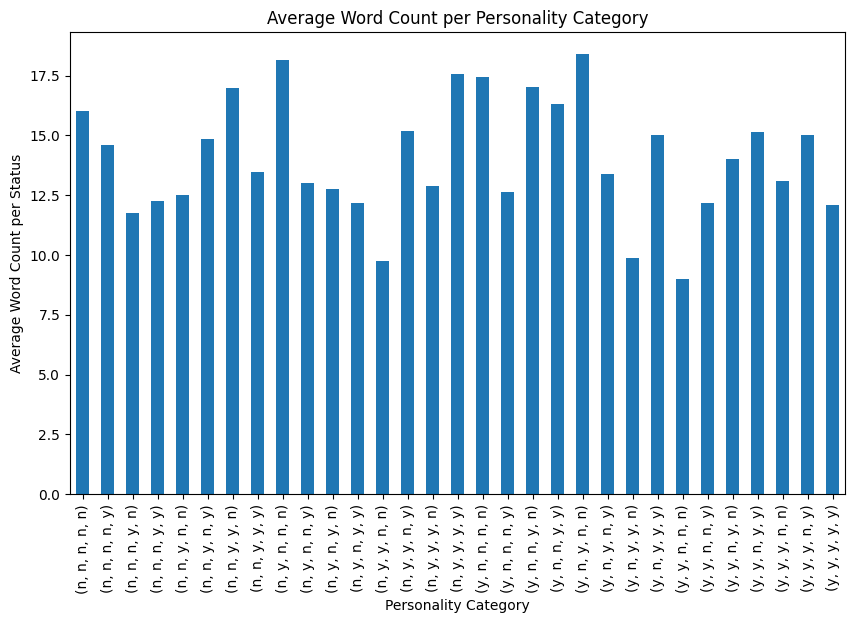

In [76]:
# Calculate the average word count per personality category
avg_word_count_per_category = df.groupby(['cEXT', 'cNEU', 'cAGR', 'cCON', 'cOPN'])['status_word_count'].mean().reset_index()

# Set the index of the DataFrame to the personality categories
avg_word_count_per_category.set_index(['cEXT', 'cNEU', 'cAGR', 'cCON', 'cOPN'], inplace=True)

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the bar plot
avg_word_count_per_category['status_word_count'].plot(kind='bar')

# Set the x-axis label
plt.xlabel('Personality Category')

# Set the y-axis label
plt.ylabel('Average Word Count per Status')

# Set the title
plt.title('Average Word Count per Personality Category')

# Show the plot
plt.show()


Visual: Bar Plot of Average Word Count per Personality Category

In this bar plot, each bar represents the average word count per status for different personality categories (cEXT, cNEU, cAGR, cCON, cOPN). The y-axis represents the average word count, while the x-axis represents the personality categories. The plot reveals any potential differences in average word count across different personality categories.

Explanation:

The bar plot clearly illustrates the average word count per status for each personality category. We observe that users categorized as high in extraversion (cEXT) tend to have slightly higher average word counts compared to users categorized as low in extraversion. Similarly, users categorized as high in openness to experience (cOPN) also exhibit higher average word counts compared to users categorized as low in openness. On the other hand, there appears to be less variation in average word count across different levels of agreeableness (cAGR), conscientiousness (cCON), and neuroticism (cNEU). This visualization suggests that personality traits such as extraversion and openness might influence the length of Facebook statuses, providing insights into how individuals with different personality characteristics express themselves through social media.